In [1]:

import glob
import re, os
import pickle
from gensim import corpora
from gensim.models import TfidfModel
from gensim import similarities
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline






In [ ]:
folder = "datasets/"
files = glob.glob(folder+'*.txt')
files.sort()

In [2]:

txts = []
titles = []

for n in files:
    # Open each file
    f = open(n, encoding='utf-8-sig')
    pattern=re.sub('[\W_]+', ' ',f.read())            
    txts.append(pattern)
    titles.append(os.path.basename(n).replace(".txt",""))

[len(t) for t in txts]

[123231,
 496068,
 1776539,
 617088,
 913713,
 624232,
 335920,
 523021,
 797401,
 901406,
 1047518,
 1010643,
 767492,
 1660866,
 298319,
 916267,
 1093567,
 1043499,
 341447,
 1149574]

In [3]:

for i in range(len(titles)):
    if titles[i]=="OriginofSpecies":
        ori=i    



15


In [4]:

stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())
txts_lower_case = [txt.lower() for txt in txts]
txts_split = [txt.split() for txt in txts_lower_case]
texts = [[word for word in tk if word not in stoplist] for tk in txts_split]

In [5]:

texts_stem = pickle.load(open ('datasets/texts_stem.p','rb'))
texts_stem[ori][:20]


['on',
 'origin',
 'speci',
 'but',
 'with',
 'regard',
 'materi',
 'world',
 'can',
 'least',
 'go',
 'so',
 'far',
 'thi',
 'can',
 'perceiv',
 'event',
 'are',
 'brought',
 'about']

In [6]:

dictionary = corpora.Dictionary(texts_stem)
bows = [dictionary.doc2bow(tx) for tx in texts_stem]
bows[ori][:5]

[(0, 11), (5, 51), (6, 1), (8, 2), (21, 1)]

In [7]:
df_bow_origin = pd.DataFrame(bows[ori])
df_bow_origin.columns=["index","occurrences"]
df_bow_origin["token"]=[dictionary[index] for index in df_bow_origin["index"]]
df_bow_origin.sort_values(by="occurrences",ascending=False).head(10)

,index,occurrences,token
748,1168,2023,have
1119,1736,1558,on
1489,2288,1543,speci
892,1366,1480,it
239,393,1362,by
1128,1747,1201,or
125,218,1140,are
665,1043,1137,from
1774,2703,1000,with
1609,2452,962,thi


In [8]:
model = TfidfModel(bows)
print(model[bows[ori]])

[(8, 0.00020383224047642202), (21, 0.0005716037746542094), (23, 0.0017118699041370883), (27, 0.0006458270601429994), (28, 0.0025678048562056324), (31, 0.0008559349520685442), (35, 0.00101497410751472), (36, 0.00101497410751472), (51, 0.000886740665721021), (54, 0.00202994821502944), (56, 0.0023757190244598344), (57, 0.00010191612023821101), (63, 0.0027544680933525786), (64, 0.000509580601191055), (66, 0.00020383224047642202), (67, 0.0023757190244598344), (68, 0.00202994821502944), (75, 0.0013772340466762893), (76, 0.0004433703328605105), (78, 0.004171843479607349), (80, 0.0020859217398036746), (83, 0.00857405661981314), (84, 0.000509580601191055), (88, 0.002445986885717064), (89, 0.0033632319678609636), (90, 0.000886740665721021), (91, 0.0016747506839411234), (94, 0.000886740665721021), (95, 0.0004433703328605105), (96, 0.003546962662884084), (97, 0.0016306579238113761), (102, 0.037686478293143394), (104, 0.000917245082143899), (106, 0.001417375386254771), (108, 0.0035434384656369273),

In [9]:

df_tfidf = pd.DataFrame(model[bows[ori]])
df_tfidf.columns=["id","score"]
df_tfidf["token"]=[dictionary[idx] for idx in df_tfidf["id"]]
df_tfidf.sort_values(by="score",ascending=False)

,id,score,token
878,2164,0.327414,select
3106,10108,0.203908,pigeon
128,369,0.197721,breed
2988,9396,0.167496,migrat
945,2325,0.148186,steril
284,752,0.145990,domest
503,1255,0.128272,hybrid
370,966,0.127534,fertil
3889,16210,0.124392,rtner
3540,12715,0.121197,naturalis


In [21]:
sims = similarities.MatrixSimilarity(model[bows])
sim_df = pd.DataFrame(list(sims))
sim_df.columns = titles
sim_df.index = titles
sim_df

,Autobiography,CoralReefs,DescentofMan,DifferentFormsofFlowers,EffectsCrossSelfFertilization,ExpressionofEmotionManAnimals,FormationVegetableMould,FoundationsOriginofSpecies,GeologicalObservationsSouthAmerica,InsectivorousPlants,LifeandLettersVol1,LifeandLettersVol2,MonographCirripedia,MonographCirripediaVol2,MovementClimbingPlants,OriginofSpecies,PowerMovementPlants,VariationPlantsAnimalsDomestication,VolcanicIslands,VoyageBeagle
Autobiography,1.000000,0.049467,0.080428,0.066482,0.077184,0.088723,0.040678,0.059271,0.030562,0.014878,0.396709,0.217129,0.005686,0.008483,0.022856,0.099991,0.016247,0.049018,0.038556,0.183507
CoralReefs,0.049467,1.000000,0.009480,0.001952,0.001923,0.004999,0.029432,0.022096,0.061027,0.002276,0.030965,0.017558,0.006324,0.010579,0.001518,0.039089,0.002707,0.011586,0.057514,0.267749
DescentofMan,0.080428,0.009480,1.000000,0.072761,0.029968,0.148670,0.027055,0.135775,0.009698,0.009404,0.059684,0.080314,0.053506,0.043275,0.005146,0.267554,0.011357,0.232841,0.007882,0.123917
DifferentFormsofFlowers,0.066482,0.001952,0.072761,1.000000,0.391834,0.006474,0.010585,0.040104,0.002846,0.007502,0.015933,0.046523,0.009405,0.005484,0.008151,0.128909,0.018964,0.050023,0.002611,0.013124
EffectsCrossSelfFertilization,0.077184,0.001923,0.029968,0.391834,1.000000,0.006844,0.032262,0.040288,0.002246,0.006777,0.019504,0.046504,0.003212,0.002962,0.014932,0.146441,0.039770,0.055132,0.002178,0.017140
ExpressionofEmotionManAnimals,0.088723,0.004999,0.148670,0.006474,0.006844,1.000000,0.020985,0.047202,0.005217,0.011475,0.064873,0.048886,0.016825,0.029897,0.005913,0.062979,0.011317,0.083847,0.005561,0.098961
FormationVegetableMould,0.040678,0.029432,0.027055,0.010585,0.032262,0.020985,1.000000,0.021470,0.067989,0.035589,0.027916,0.023620,0.019866,0.023984,0.038820,0.049259,0.040182,0.033147,0.059407,0.097908
FoundationsOriginofSpecies,0.059271,0.022096,0.135775,0.040104,0.040288,0.047202,0.021470,1.000000,0.028028,0.006023,0.057820,0.054782,0.007618,0.010883,0.003973,0.322405,0.008788,0.194533,0.017590,0.089132
GeologicalObservationsSouthAmerica,0.030562,0.061027,0.009698,0.002846,0.002246,0.005217,0.067989,0.028028,1.000000,0.006879,0.028551,0.012104,0.009687,0.024738,0.002043,0.058046,0.003491,0.014389,0.373249,0.260141
InsectivorousPlants,0.014878,0.002276,0.009404,0.007502,0.006777,0.011475,0.035589,0.006023,0.006879,1.000000,0.005967,0.016518,0.019214,0.020023,0.249814,0.014961,0.023056,0.010522,0.008544,0.014776


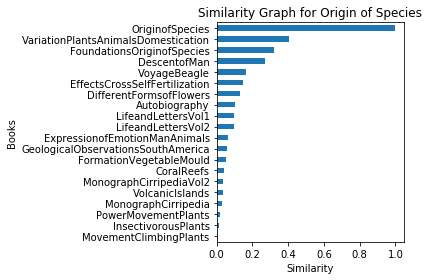

In [19]:

v = sim_df["OriginofSpecies"]
v_sorted = v.sort_values()
v_sorted.plot.barh(x='lab', y='val').plot()
plt.xlabel('Similarity')
plt.ylabel('Books')
plt.title('Similarity Graph for Origin of Species')

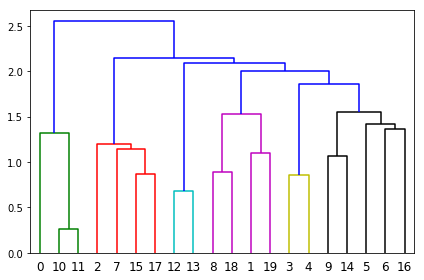

In [24]:
Z = hierarchy.linkage(sim_df,'ward')
dn=hierarchy.dendrogram(Z)
plt.show()